# 01- Preparing the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure

In [2]:
path=r'C:\Users\jphil\OneDrive\Documents\CareerFoundry Data Analytics\Specialization- Machine Learning'

In [3]:
df=pd.read_csv(os.path.join(path, 'Data Sets', 'climate_scaled.csv'), index_col=False)

In [4]:
#dropping columns pertaining to the 3 stations not included in the answers dataset
df_drop=df.drop(columns=['GDANSK_cloud_cover','GDANSK_humidity', 'GDANSK_precipitation','GDANSK_snow_depth','GDANSK_temp_mean','GDANSK_temp_min','GDANSK_temp_max','ROMA_cloud_cover','ROMA_wind_speed','ROMA_humidity','ROMA_pressure','ROMA_sunshine','ROMA_temp_mean','TOURS_wind_speed','TOURS_humidity','TOURS_pressure','TOURS_global_radiation','TOURS_precipitation','TOURS_temp_mean','TOURS_temp_min','TOURS_temp_max'])

In [5]:
#importing answers dataset
answers=pd.read_csv(os.path.join(path, 'Data Sets', 'Pleasant_Weather_Answers.csv'), index_col=False)

In [6]:
# Drop 'Unnamed: 0' from both DataFrames
df_drop = df_drop.drop(columns=['Unnamed: 0'], errors='ignore')
answers = answers.drop(columns=['Unnamed: 0'], errors='ignore')

In [7]:
locations = list({x.split("_")[0] for x in df_drop.columns if x not in ["MONTH", "DATE", "Unnamed: 0", "id"]})
locations.sort()
print(locations) 

['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


In [8]:
#Create an 'X' matrix by dropping the unneeded columns.
X = df_drop.drop(['DATE', 'MONTH'], axis=1)
y = answers.drop(['DATE'], axis=1)

In [9]:
print(X.shape)
print(y.shape)

(22950, 148)
(22950, 15)


In [10]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 148)
(5738, 148)
(17212, 15)
(5738, 15)


# 02- Decision Tree Adjustment- Class Balancing

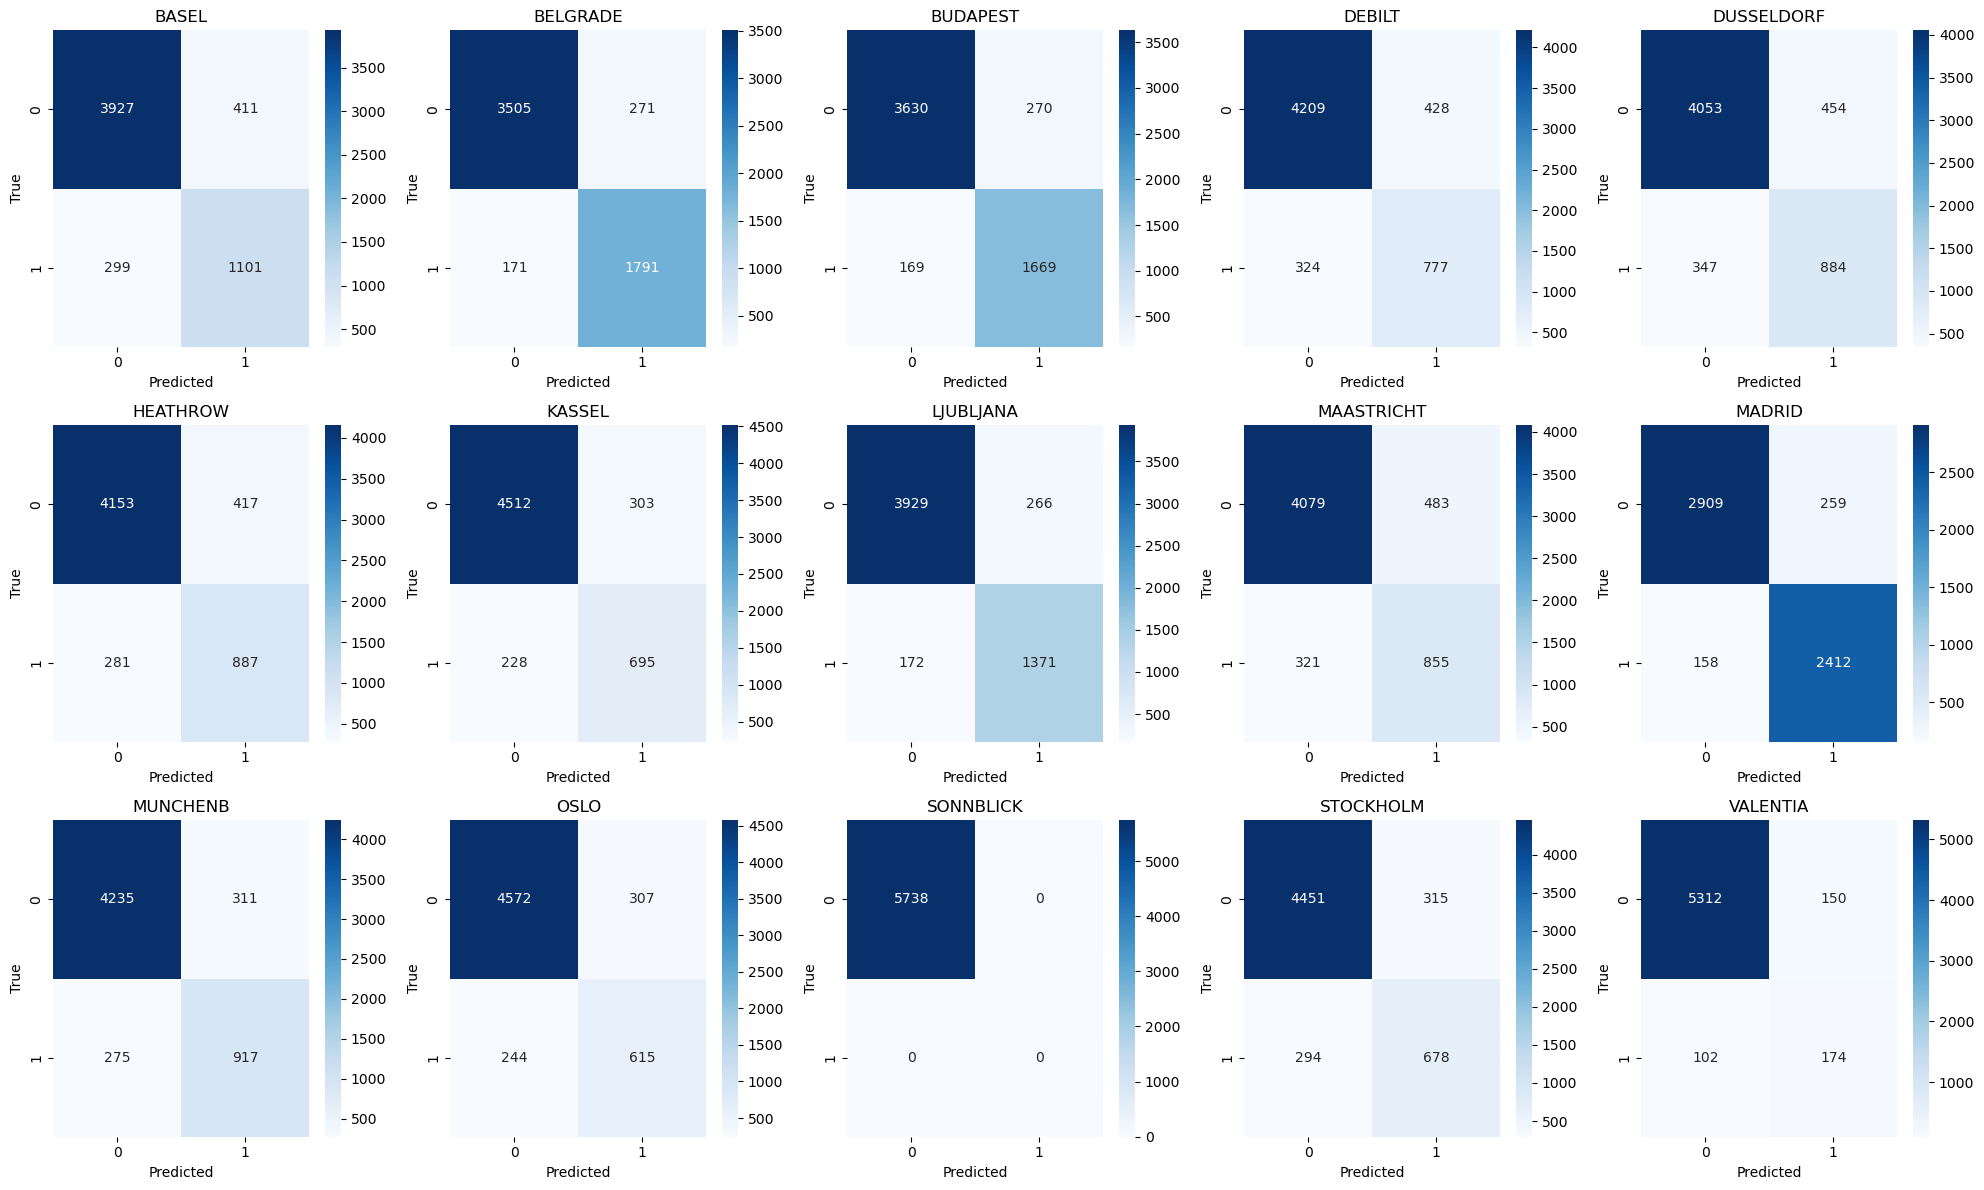

In [13]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate multilabel confusion matrix
cm_balanced_multilabel = multilabel_confusion_matrix(y_test, y_pred_balanced)

# List of station names (replace with actual station names)
station_names = ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 
                 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 
                 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']

# Define number of rows and columns for the grid
n_labels = cm_balanced_multilabel.shape[0]
n_cols = 5  # Number of columns for the grid
n_rows = (n_labels + n_cols - 1) // n_cols  # Calculate number of rows

# Create a grid of subplots to display confusion matrices for all labels
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

# Plot each confusion matrix for each station label
for i, cm in enumerate(cm_balanced_multilabel):
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{station_names[i]}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

# Remove any unused subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [14]:
from sklearn.metrics import classification_report

# Generate classification report
print("Classification Report with Class Weighting:\n", classification_report(y_test, y_pred_balanced))

Classification Report with Class Weighting:
               precision    recall  f1-score   support

           0       0.73      0.79      0.76      1400
           1       0.87      0.91      0.89      1962
           2       0.86      0.91      0.88      1838
           3       0.64      0.71      0.67      1101
           4       0.66      0.72      0.69      1231
           5       0.68      0.76      0.72      1168
           6       0.70      0.75      0.72       923
           7       0.84      0.89      0.86      1543
           8       0.64      0.73      0.68      1176
           9       0.90      0.94      0.92      2570
          10       0.75      0.77      0.76      1192
          11       0.67      0.72      0.69       859
          12       0.00      0.00      0.00         0
          13       0.68      0.70      0.69       972
          14       0.54      0.63      0.58       276

   micro avg       0.76      0.81      0.79     18211
   macro avg       0.68      0.73  

C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_cla

# 03- Random Forest with Class Weighting

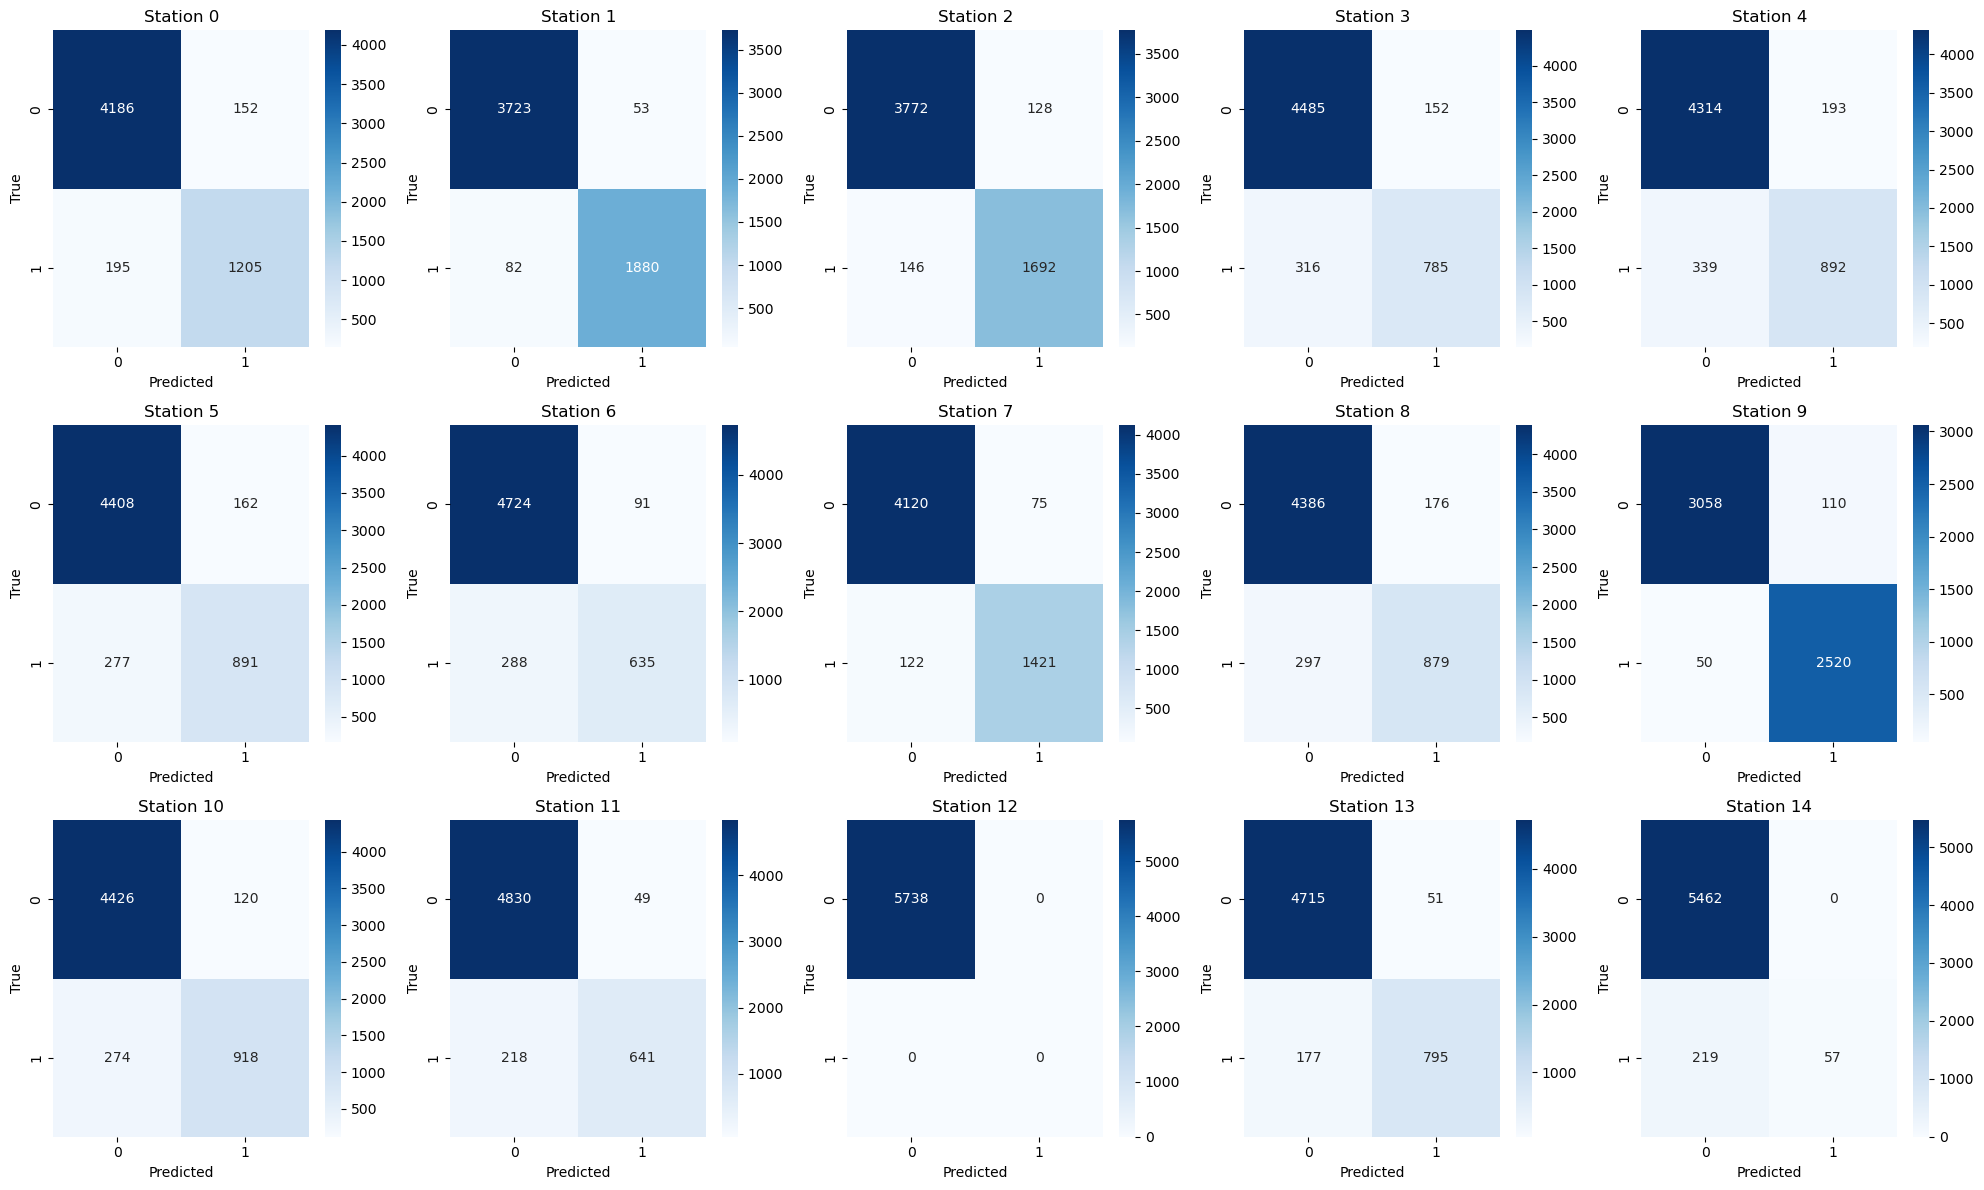

In [20]:
from sklearn.metrics import multilabel_confusion_matrix

# Generate multilabel confusion matrix
cm_rf_multi = multilabel_confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix for each label
n_labels = cm_rf_multi.shape[0]
n_cols = 5  # Number of columns for the grid
n_rows = (n_labels + n_cols - 1) // n_cols  # Calculate number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

# Plot confusion matrix for each label
for i, cm in enumerate(cm_rf_multi):
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Station {i}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

plt.tight_layout()
plt.show()

In [21]:
# Generate classification report for the current iteration
from sklearn.metrics import classification_report

# Assuming y_test and y_pred_rf are available
print("Classification Report (with Class Balancing - Decision Tree):")
print(classification_report(y_test, y_pred_rf))

Classification Report (with Class Balancing - Decision Tree):
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1400
           1       0.97      0.96      0.97      1962
           2       0.93      0.92      0.93      1838
           3       0.84      0.71      0.77      1101
           4       0.82      0.72      0.77      1231
           5       0.85      0.76      0.80      1168
           6       0.87      0.69      0.77       923
           7       0.95      0.92      0.94      1543
           8       0.83      0.75      0.79      1176
           9       0.96      0.98      0.97      2570
          10       0.88      0.77      0.82      1192
          11       0.93      0.75      0.83       859
          12       0.00      0.00      0.00         0
          13       0.94      0.82      0.87       972
          14       1.00      0.21      0.34       276

   micro avg       0.91      0.84      0.87     18211
   macro avg      

C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_cla

# 04- Class Weighting again

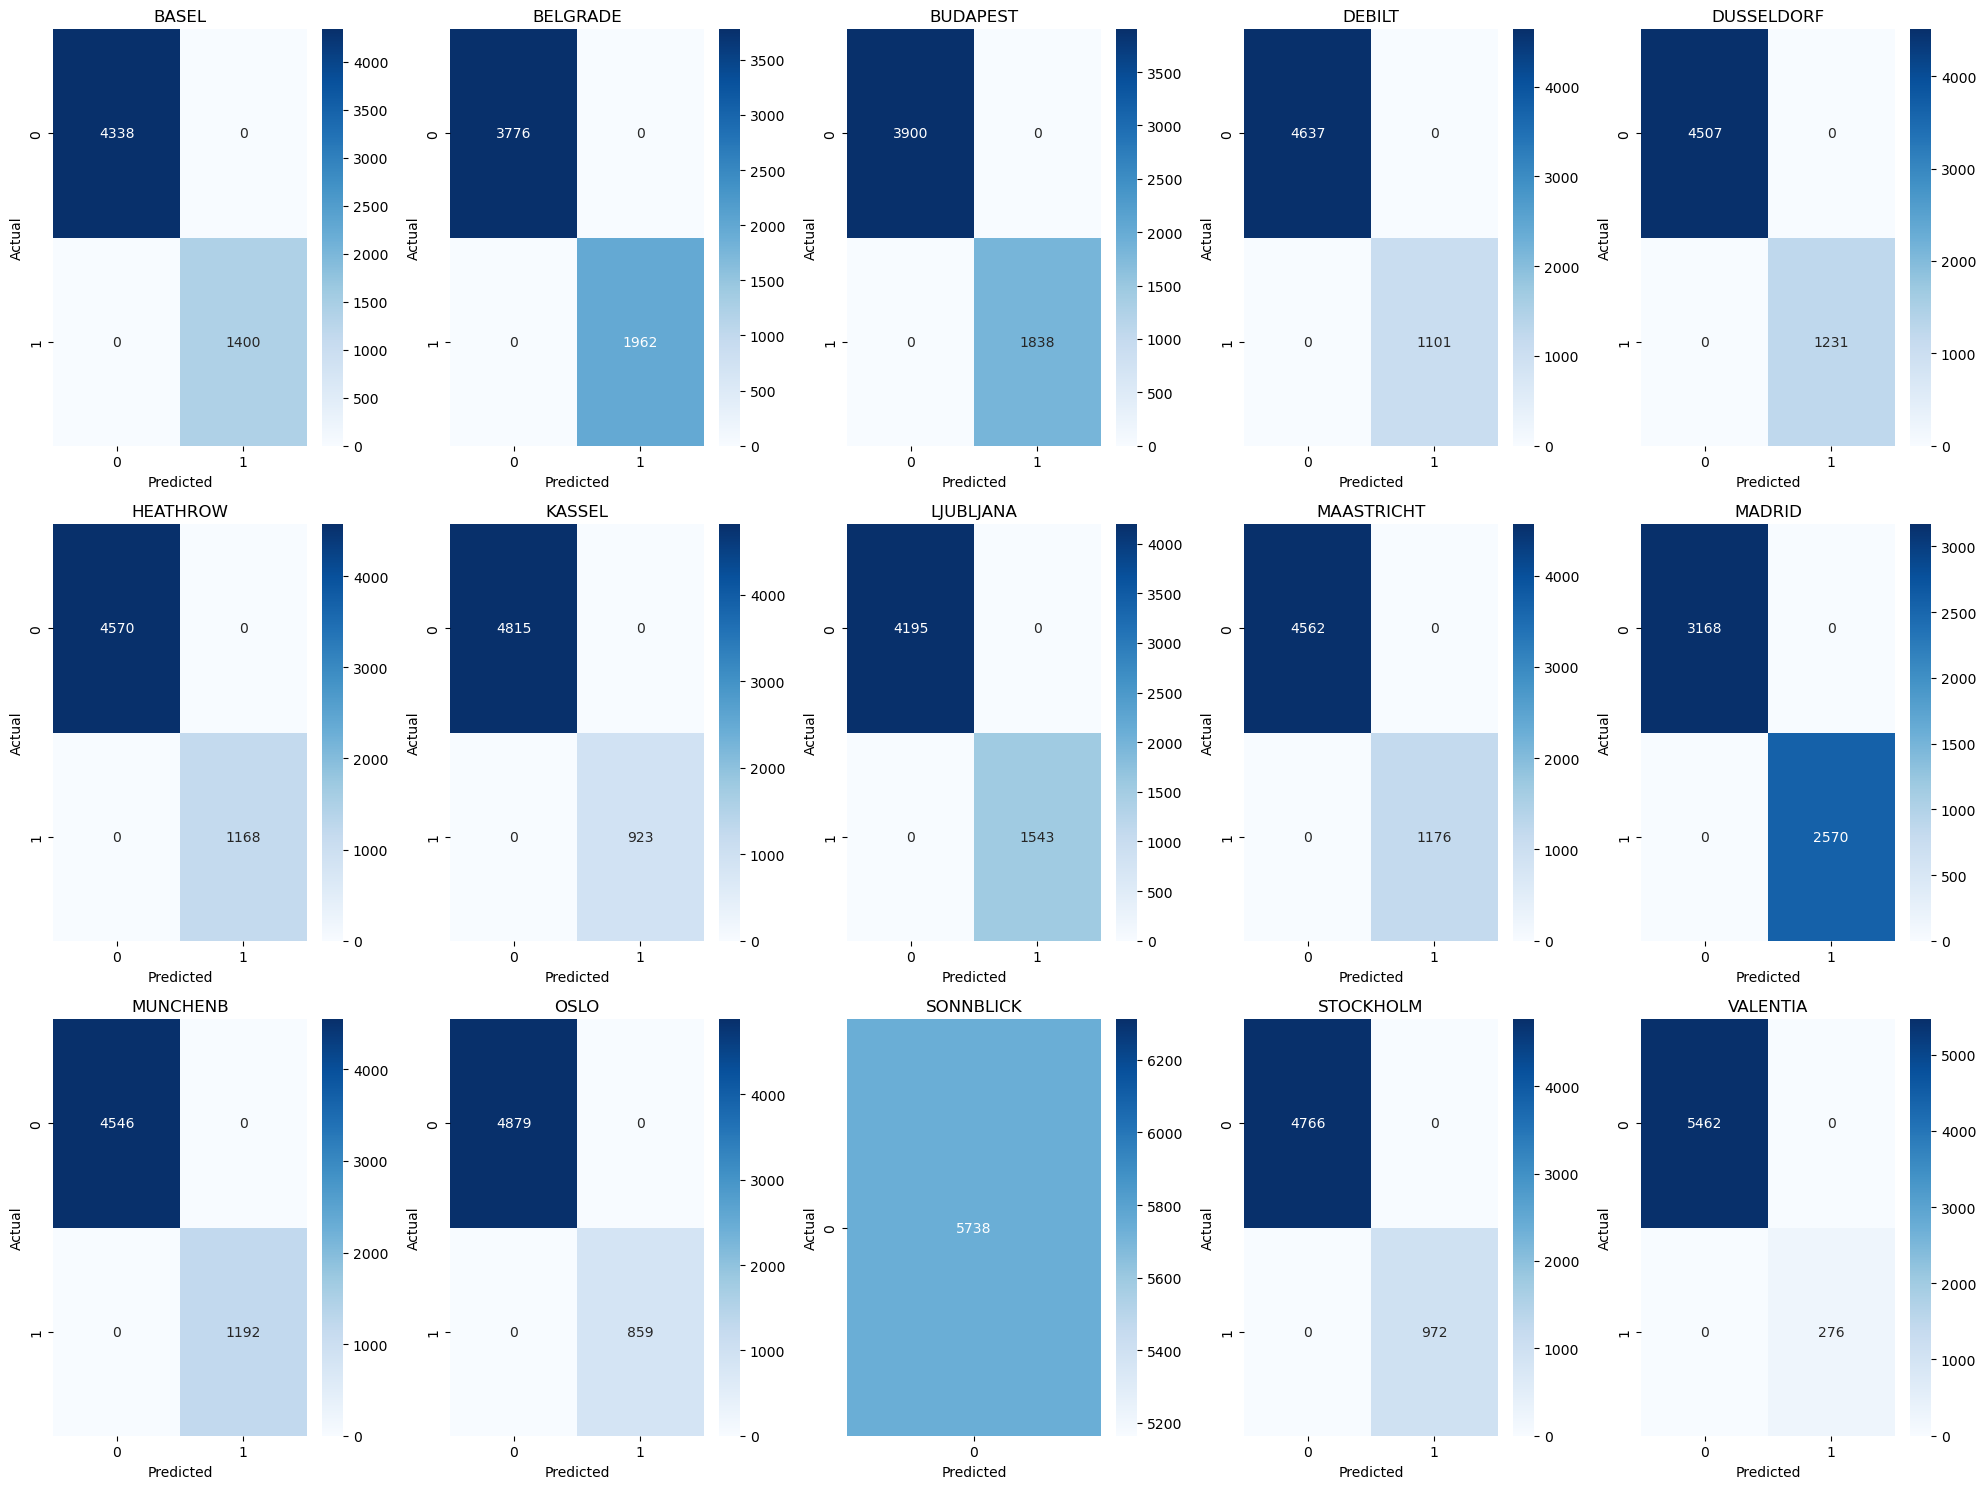

In [28]:
# List of station names (same as earlier in your dataset)
station_names = ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 
    'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 
    'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']    

# Ensure y_test and y_pred_multi are NumPy arrays
y_test_np = np.array(y_test)
y_pred_multi_np = np.array(y_pred_multi)

# Number of rows and columns for the grid
nrows = 3
ncols = 5

# Create a grid of subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Generate confusion matrices for each station and plot in the grid
for i in range(y_test_np.shape[1]):
    cm = confusion_matrix(y_test_np[:, i], y_pred_multi_np[:, i])
    
    sns.heatmap(cm, annot=True, fmt='g', ax=axes[i], cmap='Blues')
    axes[i].set_title(f'{station_names[i]}')  # Use station names here
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

# Adjust the layout
plt.tight_layout()
plt.show()

In [29]:
# Generate and print classification report for the tuned decision tree model
print("Classification Report (with Class Balancing - Final Iteration):\n")
print(classification_report(y_test, y_pred_multi))

Classification Report (with Class Balancing - Final Iteration):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1400
           1       1.00      1.00      1.00      1962
           2       1.00      1.00      1.00      1838
           3       1.00      1.00      1.00      1101
           4       1.00      1.00      1.00      1231
           5       1.00      1.00      1.00      1168
           6       1.00      1.00      1.00       923
           7       1.00      1.00      1.00      1543
           8       1.00      1.00      1.00      1176
           9       1.00      1.00      1.00      2570
          10       1.00      1.00      1.00      1192
          11       1.00      1.00      1.00       859
          12       0.00      0.00      0.00         0
          13       1.00      1.00      1.00       972
          14       1.00      1.00      1.00       276

   micro avg       1.00      1.00      1.00     18211
   macro avg   

C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_cla

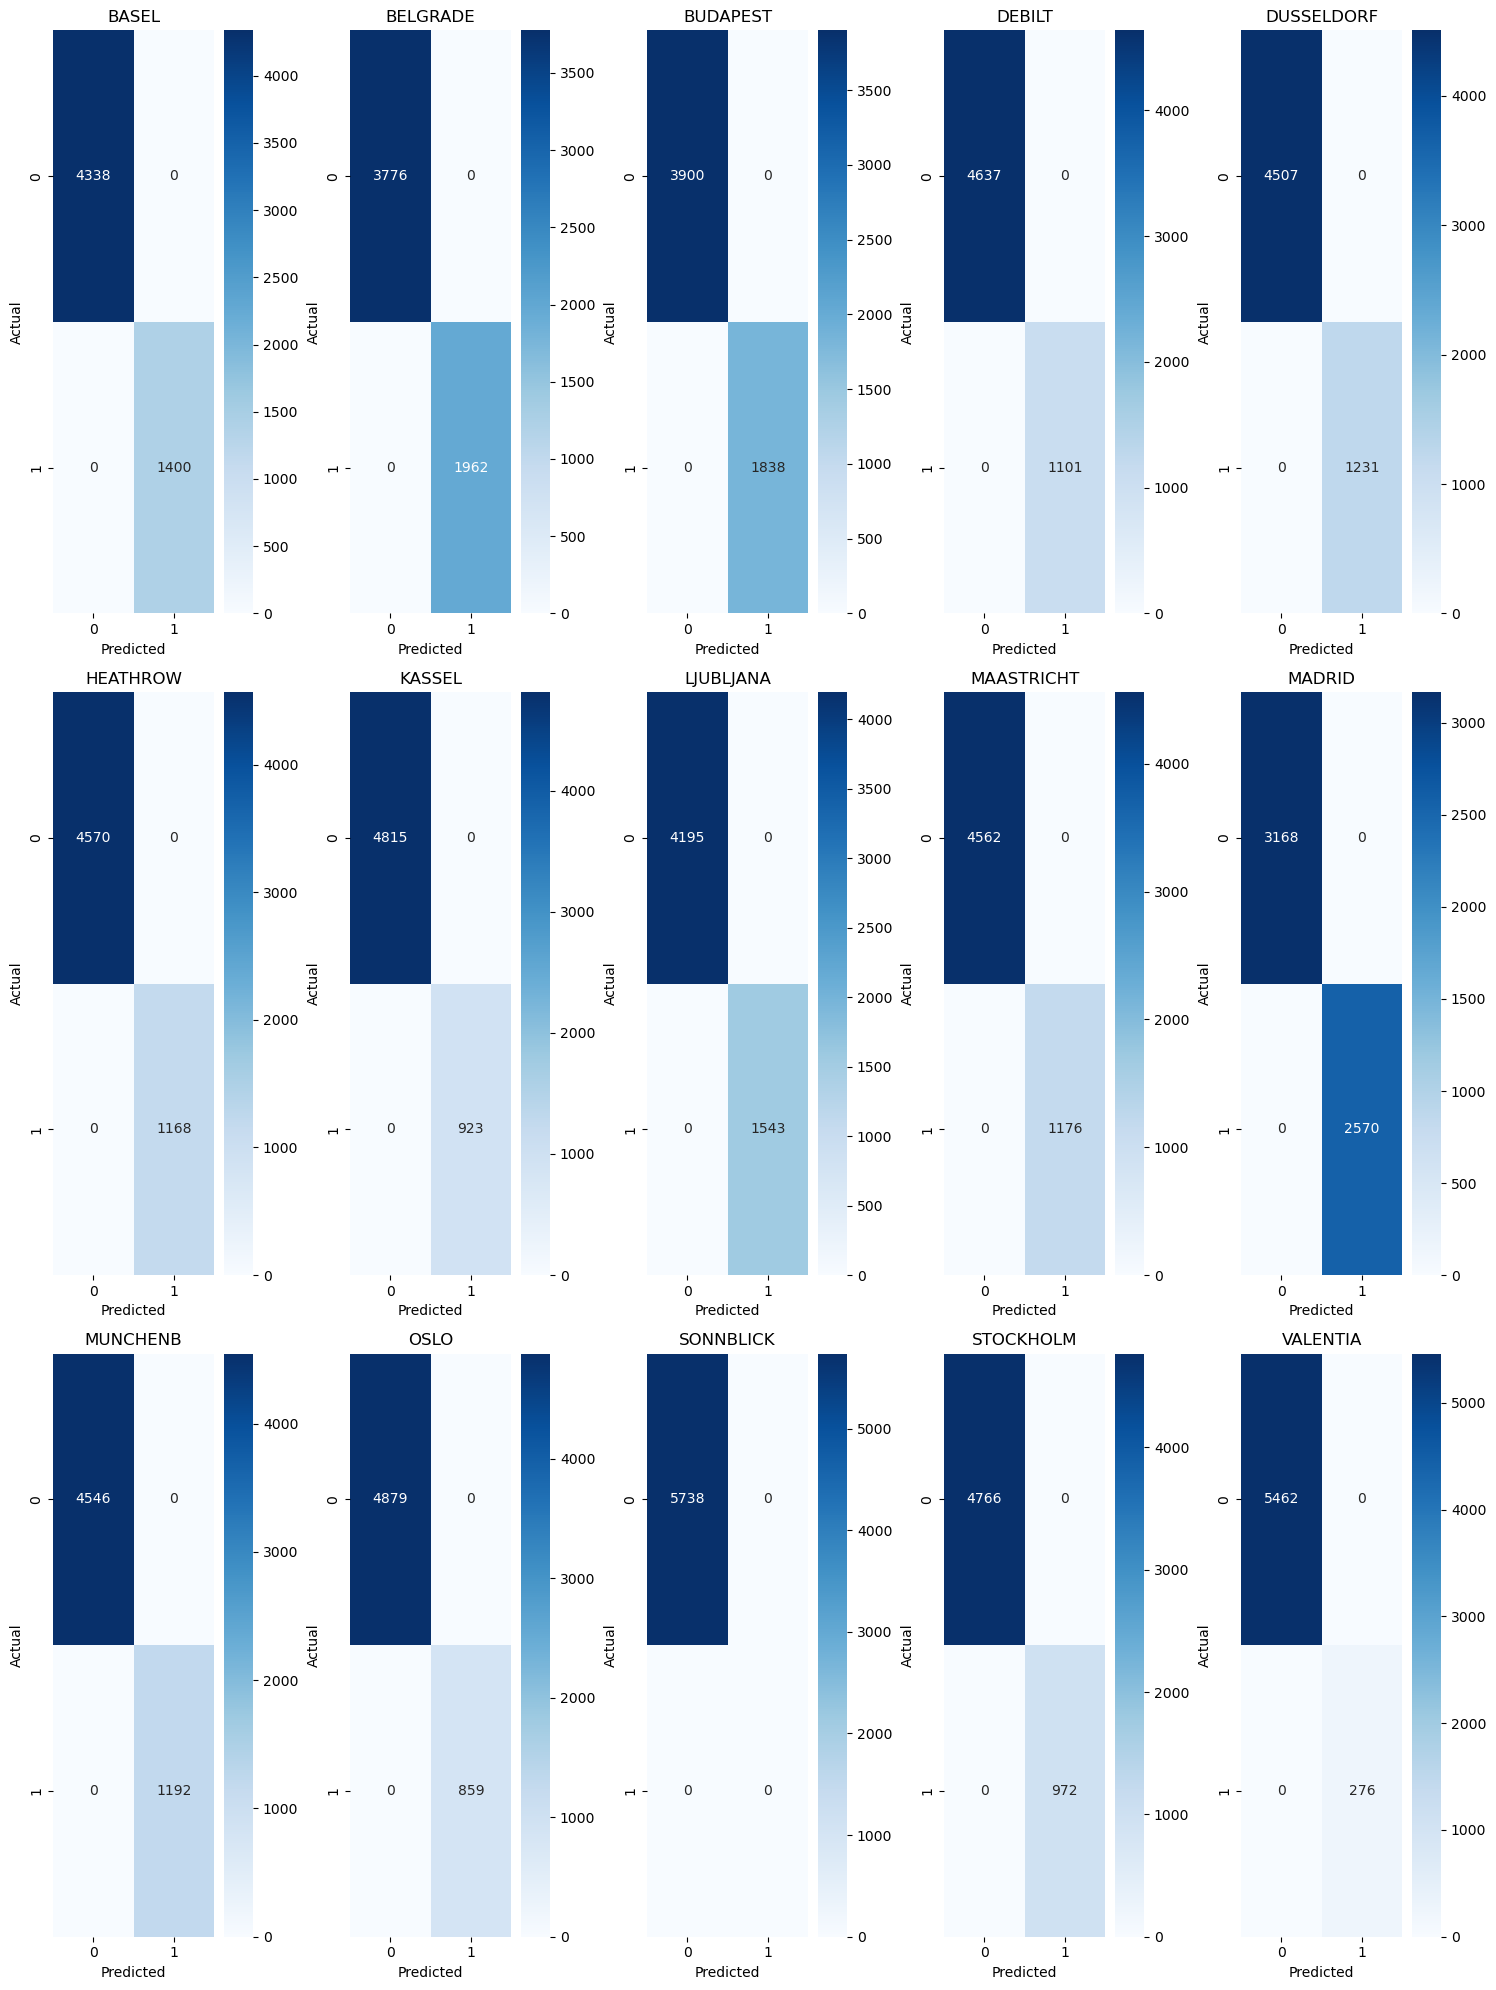

In [32]:
# Predict on the test set
y_pred_test = dtree_multi.predict(X_test)

# Generate the confusion matrix for the test set
cm_test = multilabel_confusion_matrix(y_test, y_pred_test)

# Plot confusion matrices for each station
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 20))
axes = axes.flatten()

for i, ax in enumerate(axes):
    sns.heatmap(cm_test[i], annot=True, fmt='g', ax=ax, cmap='Blues')
    ax.set_title(f'{locations[i]}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

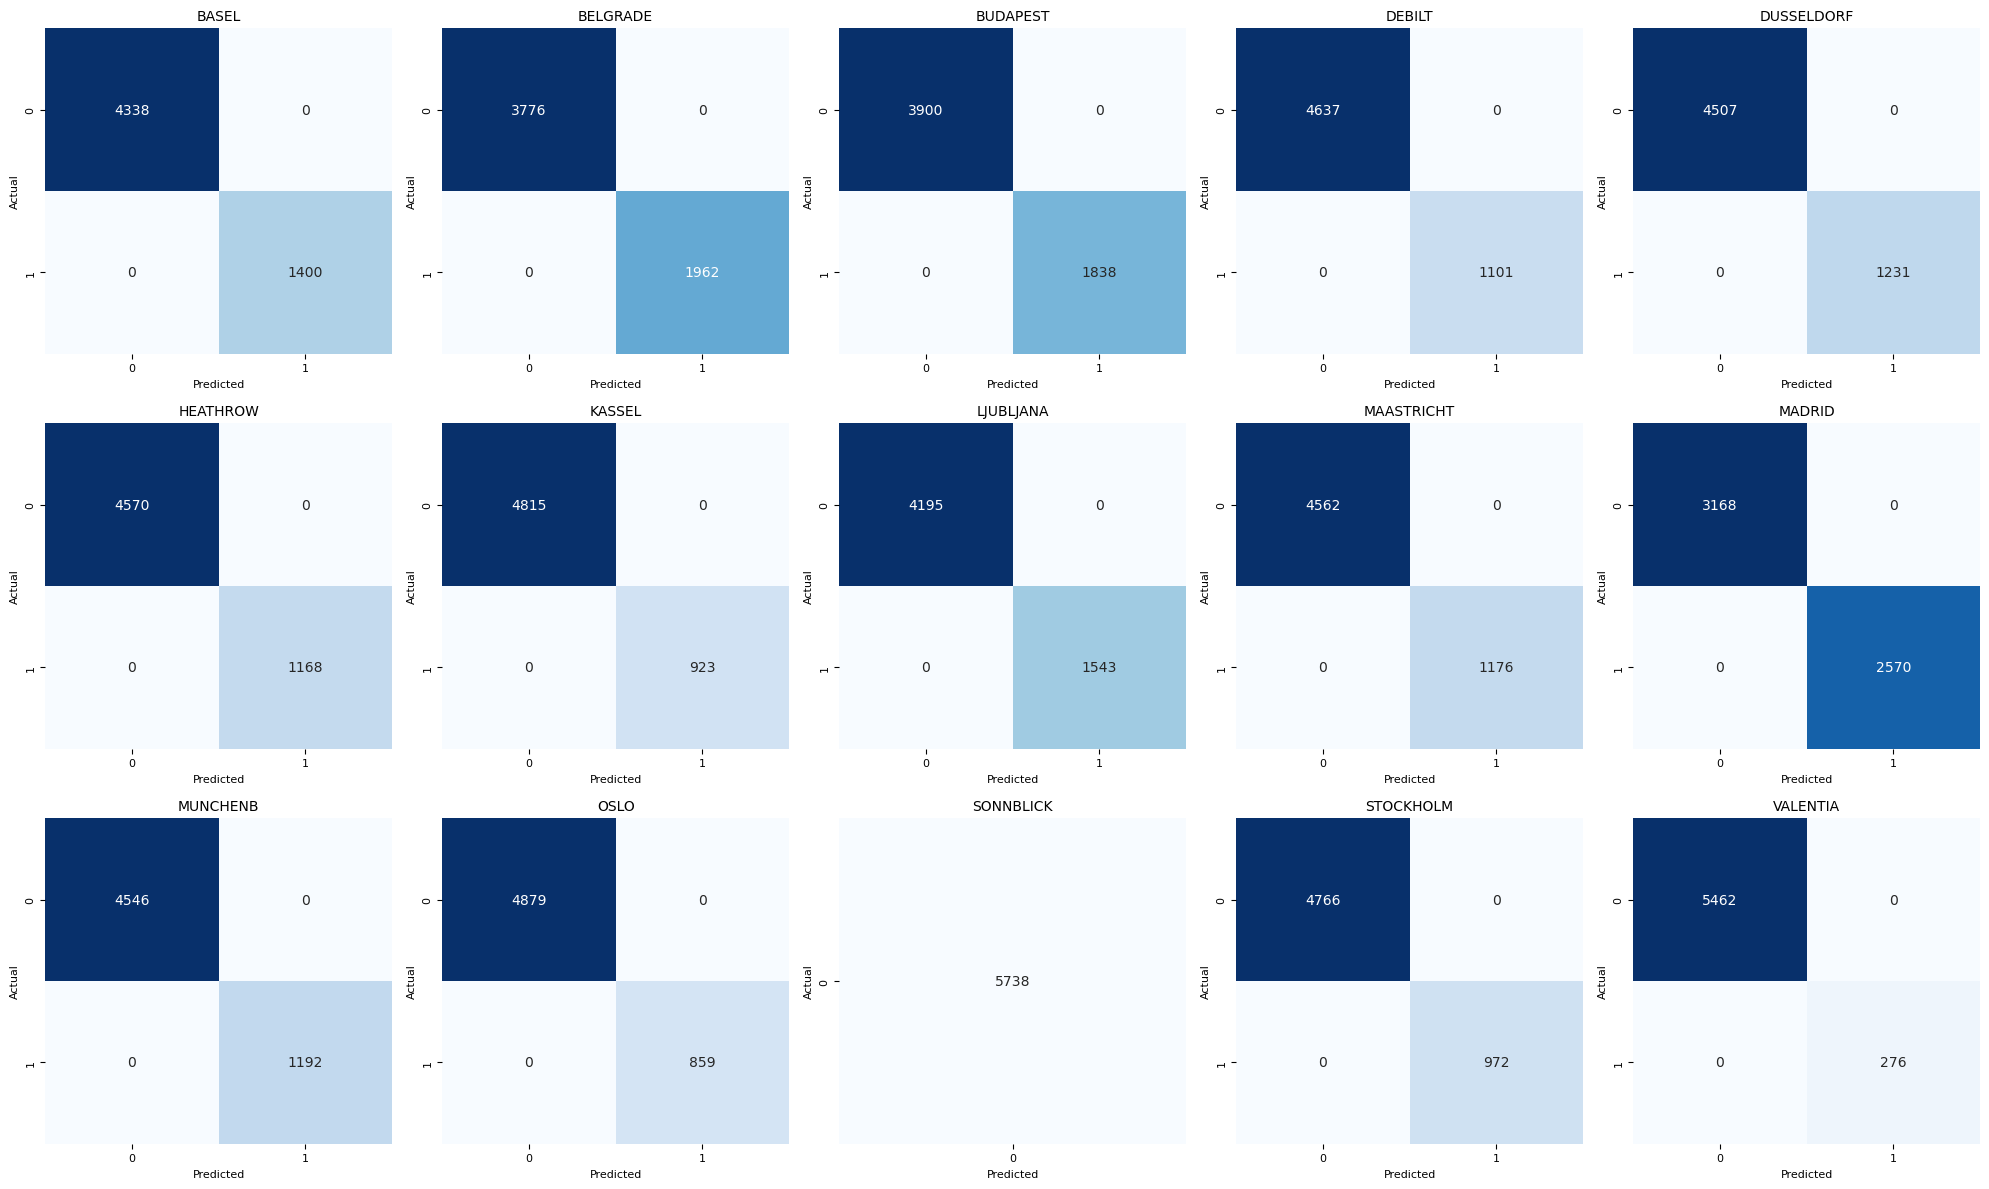

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Ensure y_test and y_pred_test are numpy arrays
y_test_np = np.array(y_test)
y_pred_test_np = np.array(y_pred_test)

# List of station labels to use in the plot
station_names = ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 
                 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 
                 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']

# Create a grid of subplots to display confusion matrices for all labels
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < y_test_np.shape[1]:  # To ensure we don't index out of bounds
        cm = confusion_matrix(y_test_np[:, i], y_pred_test_np[:, i])
        sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues', cbar=False)
        ax.set_title(station_names[i], fontsize=10)
        ax.set_xlabel('Predicted', fontsize=8)
        ax.set_ylabel('Actual', fontsize=8)
        ax.tick_params(axis='x', labelsize=8)
        ax.tick_params(axis='y', labelsize=8)
    else:
        # Turn off unused subplots
        ax.axis('off')

plt.tight_layout()
plt.show()

In [46]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the decision tree model with the best parameters from previous iterations
dtree = DecisionTreeClassifier(random_state=42, class_weight='balanced')  # Adjust parameters as needed

# Train the model on the training set
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [47]:
# Ensure correct predictions are being made on the test set
y_pred_test = dtree.predict(X_test)

# Check the shape of y_pred_test to ensure it's aligned with the test labels
print(y_pred_test.shape)

(5738, 15)


In [48]:
from sklearn.metrics import classification_report

# Generate classification report for the test set
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76      1400
           1       0.88      0.91      0.89      1962
           2       0.87      0.90      0.88      1838
           3       0.63      0.71      0.67      1101
           4       0.66      0.72      0.69      1231
           5       0.68      0.76      0.72      1168
           6       0.68      0.76      0.72       923
           7       0.84      0.88      0.86      1543
           8       0.65      0.72      0.68      1176
           9       0.90      0.93      0.92      2570
          10       0.74      0.76      0.75      1192
          11       0.66      0.70      0.68       859
          12       0.00      0.00      0.00         0
          13       0.68      0.69      0.68       972
          14       0.57      0.63      0.59       276

   micro avg       0.76      0.81      0.78     18211
   macro avg       0.68      0.72      0.70     18211
weighted avg       0.76   

C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_cla

# 05- ANN revision- hyperparameter tuning

In [49]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define different architectures for the ANN
architectures = [
    (50, 50),
    (100, 50),
    (100, 50, 25),
    (150, 100, 50),
]

# Other parameters to tune
max_iterations = [500, 1000]
tolerances = [0.0001, 0.001]

# Results list
results = []

# Loop over each architecture
for arch in architectures:
    for max_iter in max_iterations:
        for tol in tolerances:
            # Initialize the ANN model
            mlp = MLPClassifier(hidden_layer_sizes=arch, max_iter=max_iter, tol=tol, random_state=42)
            
            # Fit the model
            mlp.fit(X_train, y_train)
            
            # Get predictions
            y_train_pred = mlp.predict(X_train)
            y_test_pred = mlp.predict(X_test)
            
            # Evaluate the model
            train_accuracy = accuracy_score(y_train, y_train_pred)
            test_accuracy = accuracy_score(y_test, y_test_pred)
            
            # Store the results
            results.append({
                "layers": arch,
                "iterations": max_iter,
                "tol": tol,
                "train_accuracy": train_accuracy,
                "test_accuracy": test_accuracy
            })

# Print or visualize the results to determine the best configuration
import pandas as pd
df_results = pd.DataFrame(results)
print(df_results)

            layers  iterations     tol  train_accuracy  test_accuracy
0         (50, 50)         500  0.0001        0.445155       0.442140
1         (50, 50)         500  0.0010        0.445155       0.442140
2         (50, 50)        1000  0.0001        0.445155       0.442140
3         (50, 50)        1000  0.0010        0.445155       0.442140
4        (100, 50)         500  0.0001        0.340344       0.347159
5        (100, 50)         500  0.0010        0.340344       0.347159
6        (100, 50)        1000  0.0001        0.340344       0.347159
7        (100, 50)        1000  0.0010        0.340344       0.347159
8    (100, 50, 25)         500  0.0001        0.413374       0.412513
9    (100, 50, 25)         500  0.0010        0.413374       0.412513
10   (100, 50, 25)        1000  0.0001        0.413374       0.412513
11   (100, 50, 25)        1000  0.0010        0.413374       0.412513
12  (150, 100, 50)         500  0.0001        0.457123       0.454862
13  (150, 100, 50)  

In [ ]:
#another round, this time adjusting the learning rates

In [50]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Define the different learning rates to test
learning_rates = [0.1, 0.01, 0.001, 0.0001]

# Set other parameters constant
layers = (100, 50, 25)
max_iter = 1000
tol = 0.0001

# Store results
results = []

# Loop through each learning rate
for lr in learning_rates:
    mlp = MLPClassifier(hidden_layer_sizes=layers, max_iter=max_iter, tol=tol, learning_rate_init=lr, random_state=42)
    mlp.fit(X_train, y_train)  # Fit the model

    # Make predictions on training and testing data
    y_pred_train = mlp.predict(X_train)
    y_pred_test = mlp.predict(X_test)

    # Calculate accuracy for both train and test sets
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    # Store the results
    results.append({
        'learning_rate': lr,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy
    })

# Convert results to DataFrame for easier visualization
results_df = pd.DataFrame(results)
print(results_df)

   learning_rate  train_accuracy  test_accuracy
0         0.1000        0.396235       0.397700
1         0.0100        0.396700       0.397525
2         0.0010        0.413374       0.412513
3         0.0001        0.400651       0.398571


In [ ]:
#now we'll adjust the number of layers

In [51]:
# List of different layer configurations to try
layer_configs = [(50, 50), (100, 50, 25), (150, 100, 50)]

# Placeholder to store results
results = []

for layers in layer_configs:
    mlp = MLPClassifier(hidden_layer_sizes=layers, max_iter=500, learning_rate_init=0.001, tol=0.0001, random_state=42)
    mlp.fit(X_train, y_train)
    
    # Predictions and accuracy
    train_accuracy = mlp.score(X_train, y_train)
    test_accuracy = mlp.score(X_test, y_test)
    
    # Store the results
    results.append({
        'layers': layers,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy
    })

# Display results
import pandas as pd
df_results = pd.DataFrame(results)
print(df_results)

           layers  train_accuracy  test_accuracy
0        (50, 50)        0.445155       0.442140
1   (100, 50, 25)        0.413374       0.412513
2  (150, 100, 50)        0.457123       0.454862


In [52]:
# List of different node configurations to try for the best layer setup
node_configs = [(100, 75, 50), (200, 150, 100)]

# Placeholder to store results
results = []

for nodes in node_configs:
    mlp = MLPClassifier(hidden_layer_sizes=nodes, max_iter=500, learning_rate_init=0.001, tol=0.0001, random_state=42)
    mlp.fit(X_train, y_train)
    
    # Predictions and accuracy
    train_accuracy = mlp.score(X_train, y_train)
    test_accuracy = mlp.score(X_test, y_test)
    
    # Store the results
    results.append({
        'nodes': nodes,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy
    })

# Display results
df_results_nodes = pd.DataFrame(results)
print(df_results_nodes)

             nodes  train_accuracy  test_accuracy
0    (100, 75, 50)        0.411806       0.407982
1  (200, 150, 100)        0.477980       0.469327


In [53]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Define the different number of iterations to test
iterations = [200, 500, 1000, 1500]

# Initialize a list to store the results
results = []

# Loop over the different iteration values
for iteration in iterations:
    # Define the ANN model with the current iteration value
    mlp = MLPClassifier(hidden_layer_sizes=(200, 150, 100), max_iter=iteration, tol=0.001, random_state=42)
    
    # Fit the model to the training data
    mlp.fit(X_train, y_train)
    
    # Make predictions on the training and test data
    y_train_pred = mlp.predict(X_train)
    y_test_pred = mlp.predict(X_test)
    
    # Calculate the training and test accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Append the results to the list
    results.append((iteration, train_accuracy, test_accuracy))

# Create a DataFrame to display the results
results_df = pd.DataFrame(results, columns=['iterations', 'train_accuracy', 'test_accuracy'])

# Display the results
print(results_df)


   iterations  train_accuracy  test_accuracy
0         200         0.47798       0.469327
1         500         0.47798       0.469327
2        1000         0.47798       0.469327
3        1500         0.47798       0.469327


In [54]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Define the different number of iterations to test
iterations = [200, 500, 1000, 1500]

# Initialize a list to store the results
results = []

# Loop over the different iteration values
for iteration in iterations:
    # Define the ANN model with the current iteration value
    mlp = MLPClassifier(hidden_layer_sizes=(200, 150, 100), max_iter=iteration, tol=0.0001, random_state=42)
    
    # Fit the model to the training data
    mlp.fit(X_train, y_train)
    
    # Make predictions on the training and test data
    y_train_pred = mlp.predict(X_train)
    y_test_pred = mlp.predict(X_test)
    
    # Calculate the training and test accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Append the results to the list
    results.append((iteration, train_accuracy, test_accuracy))

# Create a DataFrame to display the results
results_df = pd.DataFrame(results, columns=['iterations', 'train_accuracy', 'test_accuracy'])

# Display the results
print(results_df)

   iterations  train_accuracy  test_accuracy
0         200         0.47798       0.469327
1         500         0.47798       0.469327
2        1000         0.47798       0.469327
3        1500         0.47798       0.469327


In [55]:
# Define learning rates to try
learning_rates = [0.1, 0.01, 0.001, 0.0001]

# Store results
results = []

for lr in learning_rates:
    # Create the ANN model with the current learning rate
    mlp = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, tol=0.0001, learning_rate_init=lr)
    
    # Fit the model
    mlp.fit(X_train, y_train)
    
    # Predictions
    y_pred_train = mlp.predict(X_train)
    y_pred_test = mlp.predict(X_test)
    
    # Accuracy scores
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    # Store results
    results.append([lr, train_accuracy, test_accuracy])

# Display results
import pandas as pd
df_results = pd.DataFrame(results, columns=['learning_rate', 'train_accuracy', 'test_accuracy'])
print(df_results)

   learning_rate  train_accuracy  test_accuracy
0         0.1000        0.396235       0.397700
1         0.0100        0.416686       0.423144
2         0.0010        0.204683       0.205821
3         0.0001        0.497908       0.498083


In [56]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Define the different learning rates to try
learning_rates = [0.00005, 0.0002]

# Initialize an empty list to store the results
results = []

for lr in learning_rates:
    # Initialize the MLPClassifier with the given parameters
    mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 50), max_iter=1000, tol=0.0001, learning_rate_init=lr)
    
    # Fit the model to the training data
    mlp.fit(X_train, y_train)
    
    # Predict on the training and test data
    y_train_pred = mlp.predict(X_train)
    y_test_pred = mlp.predict(X_test)
    
    # Calculate the accuracy for both training and test sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Store the results in the list
    results.append({'learning_rate': lr, 'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy})

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

   learning_rate  train_accuracy  test_accuracy
0        0.00005        0.433128       0.435692
1        0.00020        0.421218       0.422273


In [57]:
# Import necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Define a range of larger layer architectures and learning rates to test
layer_configs = [(150, 150, 100), (200, 150, 100)]
learning_rates = [0.001, 0.005]

# Empty list to store results
results = []

# Loop over layer architectures and learning rates
for layers in layer_configs:
    for lr in learning_rates:
        # Initialize the MLP classifier with specified layers and learning rate
        mlp = MLPClassifier(hidden_layer_sizes=layers, max_iter=500, tol=0.0001, learning_rate_init=lr, random_state=42)

        # Fit the model on the training data
        mlp.fit(X_train, y_train)

        # Make predictions on the training set and test set
        y_pred_train = mlp.predict(X_train)
        y_pred_test = mlp.predict(X_test)

        # Calculate accuracy for both sets
        train_acc = accuracy_score(y_train, y_pred_train)
        test_acc = accuracy_score(y_test, y_pred_test)

        # Append results to the list
        results.append({
            'layers': layers,
            'learning_rate': lr,
            'train_accuracy': train_acc,
            'test_accuracy': test_acc
        })

# Convert the results into a DataFrame and display them
df_results = pd.DataFrame(results)
df_results

,layers,learning_rate,train_accuracy,test_accuracy
0,"(150, 150, 100)",0.001,0.428015,0.418438
1,"(150, 150, 100)",0.005,0.396526,0.397700
2,"(200, 150, 100)",0.001,0.477980,0.469327
3,"(200, 150, 100)",0.005,0.396990,0.398048


In [58]:
# Increase layer depth
layer_configs = [
    (200, 150, 100, 50),   # 4 layers
    (250, 200, 150, 100),  # 4 layers, increased depth
    (300, 250, 200, 150),  # 4 layers, even deeper
    (400, 300, 200, 100)   # 4 layers, highest depth
]

results_layers = []

for layers in layer_configs:
    mlp_layers = MLPClassifier(hidden_layer_sizes=layers, learning_rate_init=0.001, max_iter=500, tol=0.0001, random_state=42)
    mlp_layers.fit(X_train, y_train)
    
    # Predict and calculate accuracies
    train_accuracy = mlp_layers.score(X_train, y_train)
    test_accuracy = mlp_layers.score(X_test, y_test)
    
    # Store results
    results_layers.append({
        "layers": layers,
        "train_accuracy": train_accuracy,
        "test_accuracy": test_accuracy
    })

# Convert to DataFrame and display
df_layers = pd.DataFrame(results_layers)
print(df_layers)

                 layers  train_accuracy  test_accuracy
0   (200, 150, 100, 50)        0.091738       0.099861
1  (250, 200, 150, 100)        0.450267       0.445974
2  (300, 250, 200, 150)        0.491924       0.457128
3  (400, 300, 200, 100)        0.629793       0.487975


In [59]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Define the alpha values to test
alpha_values = [0.0001, 0.001, 0.01, 0.1]

# Store results
results = []

# Loop through each alpha value and train the model
for alpha in alpha_values:
    # Define the model with the chosen alpha value (L2 regularization)
    mlp_alpha = MLPClassifier(hidden_layer_sizes=(400, 300, 200, 100), max_iter=1000, tol=0.0001, alpha=alpha, random_state=42)
    
    # Fit the model
    mlp_alpha.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train_alpha = mlp_alpha.predict(X_train)
    y_pred_test_alpha = mlp_alpha.predict(X_test)
    
    # Calculate accuracy
    train_acc = accuracy_score(y_train, y_pred_train_alpha)
    test_acc = accuracy_score(y_test, y_pred_test_alpha)
    
    # Append results
    results.append((alpha, train_acc, test_acc))

# Create a DataFrame to store the results
results_df = pd.DataFrame(results, columns=['alpha', 'train_accuracy', 'test_accuracy'])

# Display the results
print(results_df)

    alpha  train_accuracy  test_accuracy
0  0.0001        0.629793       0.487975
1  0.0010        0.610214       0.493726
2  0.0100        0.448292       0.439526
3  0.1000        0.432605       0.438132


In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import pandas as pd

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# List of architectures to test
layers_list = [(50, 50), (100, 50), (50, 50, 25)]

# Initialize list to store results
results = []

# Loop over each layer configuration
for layers in layers_list:
    # Create the MLPClassifier with the given architecture
    mlp = MLPClassifier(hidden_layer_sizes=layers, max_iter=1000, tol=0.0001, alpha=0.001, random_state=42)
    
    # Fit the model to the training data
    mlp.fit(X_train_scaled, y_train)
    
    # Predict the train and test set
    train_accuracy = mlp.score(X_train_scaled, y_train)
    test_accuracy = mlp.score(X_test_scaled, y_test)
    
    # Store the result
    results.append({
        'layers': layers,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy
    })

# Convert the results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)
print(results_df)

         layers  train_accuracy  test_accuracy
0      (50, 50)        0.775331       0.617463
1     (100, 50)        0.817279       0.594284
2  (50, 50, 25)        0.763886       0.629313


In [62]:
# Define different combinations of tolerance and learning rate to test
tolerance_options = [0.00001, 0.0001, 0.001]
learning_rate_options = [0.001, 0.0005]

# Create a dataframe to store the results
results_fine_tune = []

# Iterate over tolerance and learning rate combinations
for tol in tolerance_options:
    for lr in learning_rate_options:
        # Initialize the ANN model with the chosen tolerance and learning rate
        mlp_fine_tune = MLPClassifier(hidden_layer_sizes=(50, 50, 25), max_iter=500, tol=tol, learning_rate_init=lr, random_state=42)
        
        # Fit the model to the scaled training data
        mlp_fine_tune.fit(X_train_scaled, y_train)

        # Calculate accuracy for both training and test sets
        train_acc = mlp_fine_tune.score(X_train_scaled, y_train)
        test_acc = mlp_fine_tune.score(X_test_scaled, y_test)

        # Append results to the dataframe
        results_fine_tune.append({
            'tol': tol,
            'learning_rate': lr,
            'train_accuracy': train_acc,
            'test_accuracy': test_acc
        })

# Convert the list of results to a DataFrame and display the results
results_fine_tune_df = pd.DataFrame(results_fine_tune)
print(results_fine_tune_df)

       tol  learning_rate  train_accuracy  test_accuracy
0  0.00001         0.0010        0.768475       0.634890
1  0.00001         0.0005        0.764757       0.618508
2  0.00010         0.0010        0.768475       0.634890
3  0.00010         0.0005        0.764757       0.618508
4  0.00100         0.0010        0.768475       0.634890
5  0.00100         0.0005        0.764757       0.618508


In [64]:
# Define the ANN model with the best configuration
mlp_best = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, tol=0.00001, learning_rate_init=0.001, random_state=42)

# Fit the model to the scaled training data
mlp_best.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = mlp_best.predict(X_test_scaled)

# Calculate and print accuracy for the test set
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy for the Best ANN Model:", test_accuracy)

# Generate and print the classification report
print("Classification Report for the Best ANN Model:\n")
print(classification_report(y_test, y_pred))

Test Accuracy for the Best ANN Model: 0.6124085047054723
Classification Report for the Best ANN Model:

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1400
           1       0.93      0.93      0.93      1962
           2       0.90      0.95      0.93      1838
           3       0.87      0.85      0.86      1101
           4       0.90      0.91      0.90      1231
           5       0.79      0.92      0.85      1168
           6       0.87      0.89      0.88       923
           7       0.85      0.91      0.88      1543
           8       0.93      0.86      0.89      1176
           9       0.96      0.96      0.96      2570
          10       0.83      0.97      0.90      1192
          11       0.85      0.87      0.86       859
          12       0.00      0.00      0.00         0
          13       0.90      0.84      0.87       972
          14       0.74      0.71      0.73       276

   micro avg       0.89      0

C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_cla

In [66]:
import numpy as np

# Check if y_test and y_pred are multilabel
if y_test.ndim > 1 and y_test.shape[1] > 1:
    # Convert one-hot encoded labels back to categorical (assuming they are one-hot encoded)
    y_test = np.argmax(y_test, axis=1)
    y_pred = np.argmax(y_pred, axis=1)

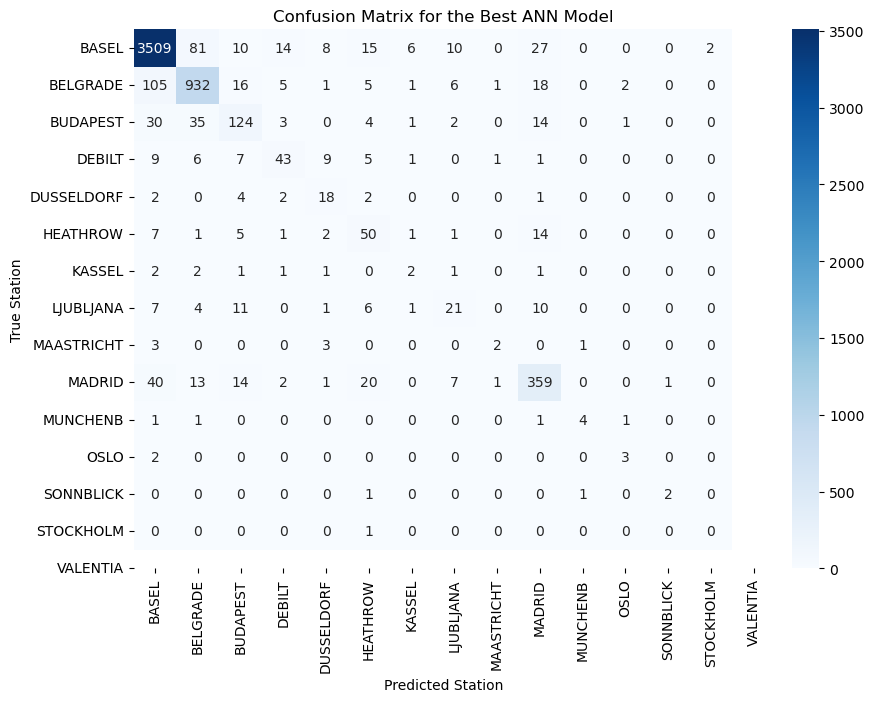

In [68]:
# Assuming station names are stored in a list called 'labels' 
labels = ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 
          'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 
          'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for the Best ANN Model")
plt.xlabel("Predicted Station")
plt.ylabel("True Station")
plt.show()